### Import Liblary

In [1]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Regresi Sederhana pada DNN

In [ ]:
x = np.array([1,2,3,4,5,6], dtype=float)
y = np.array([2,4,6,8,10,12], dtype=float)

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=[1]))

In [ ]:
model.compile(optimizer='sgd', loss='mse')

In [ ]:
# menggunakan parameter jika nilai yang di dapat sdh di tentukan maka epoch berhenti 

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 1e-4):
            self.model.stop_training = True
cb = myCallback()

## latih Model nya

In [ ]:
# semkain tinggi epoch semakin tinggi nilai nya 
model.fit (x,y, epochs=2000, callbacks=cb)

Epoch 1/2000
1/1 [==============================] - 0s 209ms/step - loss: 165.2328
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 76.5292
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 35.4741
Epoch 4/2000
1/1 [==============================] - 0s 2ms/step - loss: 16.4722
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 7.6771
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.6061
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.7216
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.8490
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4447
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2572
Epoch 11/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1701
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1294
Epoch 13/2000
1/1 [=======================

## Prediksi Data Baru 

In [ ]:
# epoch 1000 + callbacks
newData = np.array([6.0,7.0,8.0])

y_pred = model.predict(newData)
print(y_pred)

1/1 [==============================] - 0s 37ms/step
[[11.990896]
 [13.9856  ]
 [15.980304]]


## Klasifikasi dengan Dataset MNIST

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(x_train_raw, y_train_raw ),(x_test_raw, y_test_raw ) = tf.keras.datasets.mnist.load_data()

### * Encoding Label pada Gambar

In [ ]:
num_class = 10

# ONE-HOT ENCODING 
y_train = keras.utils.to_categorical(y_train_raw, num_class)
y_test  = keras.utils.to_categorical(y_test_raw, num_class)

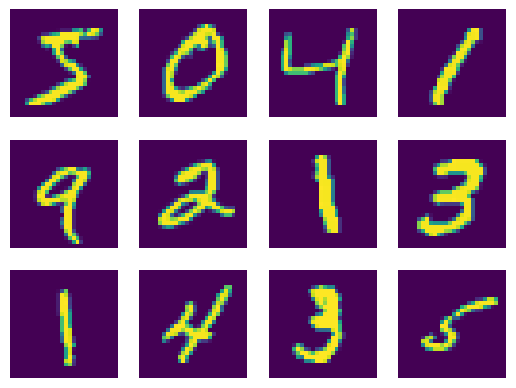

In [ ]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [ ]:
x_train_raw.shape
# 28, 28 jumlah piksel
# 60000 jumlah data

(60000, 28, 28)

In [ ]:
y_train_raw.shape

(60000,)

In [ ]:
# Konversi 28x28 jadi sebuah vektor berukuran 784x1

x_train = x_train_raw.reshape(60000,784)
x_test = x_test_raw.reshape(10000, 784)


In [ ]:
# Normalisasi piksel pada Gambar

# 255 Total nilai RGB
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Membuat DNN (Deep Neural Network)
#### Terdiri dari 3 layers dan 2 aktivasi RELU

In [ ]:
model = Sequential(
    [
        Dense(512, activation='relu', input_dim = 784),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10,  activation='softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


### Optimalisasi model 

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#jika cuma 2 shape atau 2 perbandingan seperti anjing dan kucing maka loss nya menggunakan binary_crossentropy


### Fitting training Model

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1939 - accuracy: 0.9407
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0877 - accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0630 - accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0474 - accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0397 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0350 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0269 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0248 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0246 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.020

### Evaluasi model yang telas di train 

In [ ]:
# BATCH_SIZE = 32
score = model.evaluate(x_test, y_test)
print("TEST LOSS     : ", score[0])
print("TEST ACCURACY : ", score[1])

NameError: name 'x_train' is not defined

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 9.6618e-04 - accuracy: 0.9998
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 3.5957e-04 - accuracy: 0.9999
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 1.8796e-04 - accuracy: 1.0000
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 1.1249e-04 - accuracy: 1.0000
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 7.1216e-05 - accuracy: 1.0000
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 4.3128e-05 - accuracy: 1.0000
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 2.7050e-05 - accuracy: 1.0000
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 1.6610e-05 - accuracy: 1.0000
Epoch 10/10
469/469 [==============================] - 2s 4ms/step -

In [ ]:
# BATCH_SIZE = 128
score2 = model.evaluate(x_test, y_test)
print("TEST LOSS     : ", score2[0])
print("TEST ACCURACY : ", score2[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9856
TEST LOSS     :  0.10943278670310974
TEST ACCURACY :  0.9855999946594238
